In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import requests
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('housing.csv').dropna()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
target = ['median_house_value']
X_cols = ['housing_median_age','total_rooms','total_bedrooms','population','households']
X = data[X_cols]
y = data[target]

In [4]:
X.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,1424.946949,499.433465
std,12.591805,2185.269567,421.385070,1133.208490,382.299226
min,1.000000,2.000000,1.000000,3.000000,1.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000
75%,37.000000,3143.000000,647.000000,1722.000000,604.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000


In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print out the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 11419033821.816051
R^2 Score: 0.16498114354249305


In [14]:
y_pred

array([[179290.74313995],
       [178413.20960437],
       [197935.38305215],
       ...,
       [195578.84048929],
       [216326.9405197 ],
       [127138.08702496]])

In [35]:
# Create DataFrame for plotting
results_df = pd.DataFrame({
    'Actual Values': y_test.values.ravel(),
    'Predicted Values': y_pred.ravel(),
    'Residuals': residuals.values.ravel()
})

<AxesSubplot:xlabel='Actual Values', ylabel='Residuals'>

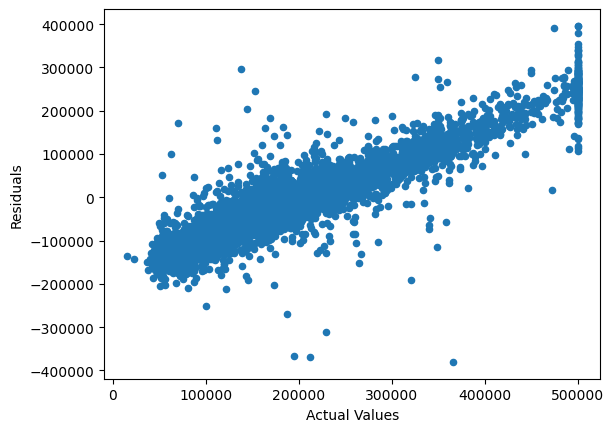

In [38]:
results_df.plot(x='Actual Values', y='Residuals', kind='scatter')